In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
current_dir = Path.cwd()
data_dir = current_dir / 'sales_data'

Task 1: Merge 12 months worth of data into a single csv file

In [6]:
year_df = pd.DataFrame()

for file_path in data_dir.glob("Sales*"):
    month_df = pd.read_csv(file_path)
    year_df = pd.concat([year_df, month_df])

year_csv = year_df.to_csv('merged_data.csv')

In [7]:
year_df 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
month = year_df["Order Date"]


month = month.str[0:2] 

year_df["Month"] = month
year_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [9]:
# I tried to avoid this work around but the column headers in each of the individual csv files keep getting appended to the
# merged dataframe. I have tried everything.

year_df = year_df[year_df["Quantity Ordered"].str[0] != 'Q']

year_df.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

Task 2: Find the total amount made from sales for each month

In [11]:
year_df.dropna(inplace = True)
year_df = year_df.astype({"Quantity Ordered":int, "Price Each":float, 'Month':int})

C:\Users\segun\AppData\Local\Temp\ipykernel_11860\335485300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df.dropna(inplace = True)


In [12]:
year_df['Total Amount'] = year_df["Quantity Ordered"] * year_df['Price Each']
year_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


Business Question 1: What month had the least amount of sales?

In [13]:
monthly_sales_total = year_df.groupby(["Month"]).sum()


In [21]:
month_dict = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul",
              8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

monthly_sales_total.index = monthly_sales_total.index.to_series().map(month_dict)
monthly_sales_total

,Quantity Ordered,Price Each,Total Amount
Month,,,
Jan,10893,1810924.81,1821413.16
Feb,13431,2186940.38,2200078.08
Mar,16979,2789084.64,2804973.35
Apr,20536,3366218.76,3389217.98
May,18653,3133134.61,3150616.23
Jun,15234,2560503.50,2576280.15
Jul,16054,2631225.12,2646461.32
Aug,13429,2226963.90,2241083.37
Sep,13091,2081897.65,2094465.69


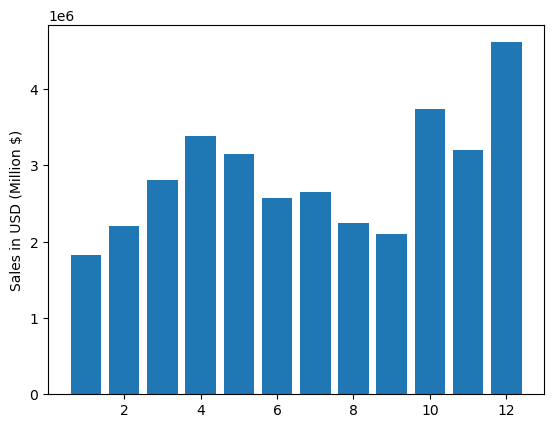

In [14]:
import matplotlib.pyplot as plt

x_values = monthly_sales_total.index
y_values = monthly_sales_total["Total Amount"]

plt.bar(x_values, y_values)
plt.ylabel('Sales in USD (Million $)')
plt.show()

Question 2: Which cities generate the most and least amount of sales?

In [15]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split()[0]


year_df['City'] = year_df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')


In [16]:
city_totals = year_df.groupby(['City']).sum()
city_totals

,Quantity Ordered,Price Each,Month,Total Amount
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


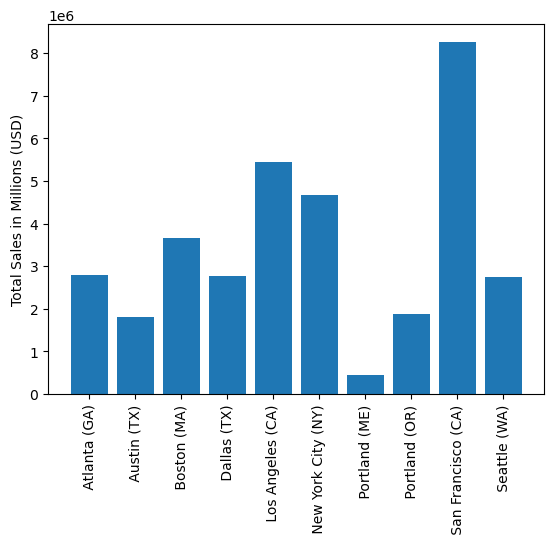

In [18]:
x_values = city_totals.index
y_values = city_totals['Total Amount']

plt.bar(x_values, y_values)
plt.ylabel('Total Sales in Millions (USD)')
plt.xticks(rotation = 'vertical')
plt.show()

Question 3: What are the most popular times for customers to place orders?

In [17]:
year_df['Order Date'] = pd.to_datetime(year_df['Order Date'], format='%m/%d/%y %H:%M')
year_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Total Amount               float64
City                        object
dtype: object

In [29]:
year_df['Hour'] = year_df['Order Date'].dt.hour
year_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount,City,Hour of Day,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8 am,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),10 pm,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2 pm,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2 pm,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9 am,9
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),8 pm,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),4 pm,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7 am,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),5 pm,17


In [52]:
am_pm_dict = {0:'Midnight',1:"1 am",2:"2 am",3:"3 am",4:"4 am",5:"5 am",6:"6 am",
              7:"7 am",8:"8 am",9:"9 am",10:"10 am",11:"11 am",12:"Noon",13:"1 pm",
              14:"2 pm",15:"3 pm",16:"4 pm",17:"5 pm",18:"6 pm",19:"7 pm",20:"8 pm",
              21:"9 pm",22:"10 pm",23:"11 pm"}
year_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


In [80]:
#totals = year_df['Hour'].value_counts() --- Value_counts() would have been better if we wanted to 
# order the counts by total instead of chronologically
totals = year_df.groupby('Hour').count()

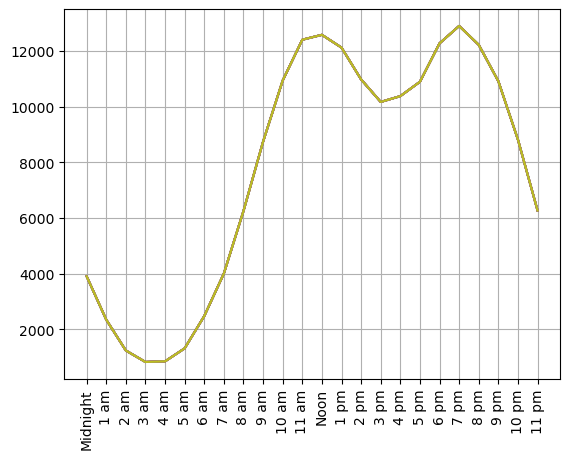

In [81]:
xvalues = totals.index.map(am_pm_dict)
plt.xticks(rotation = 'vertical')
plt.grid()
plt.plot(xvalues, totals)
plt.show()

In [71]:
tester = year_df.groupby(['Order ID'])
tester

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount,City,Hour
Order ID,,,,,,,,,
141234,1,1,1,1,1,1,1,1,1
141235,1,1,1,1,1,1,1,1,1
141236,1,1,1,1,1,1,1,1,1
141237,1,1,1,1,1,1,1,1,1
141238,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
319666,1,1,1,1,1,1,1,1,1
319667,1,1,1,1,1,1,1,1,1
319668,1,1,1,1,1,1,1,1,1


Question 3: What 2 products where sold together the most?

In [90]:
df = year_df[year_df['Order ID'].duplicated(keep = False)]
df['Grouped Items'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df

C:\Users\segun\AppData\Local\Temp\ipykernel_11860\4144111579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Items'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount,City,Hour,Grouped Items
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones, Bose SoundSport He..."
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,"Wired Headphones, AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,"Wired Headphones, AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,"Google Phone, USB-C Charging Cable"


In [94]:
ndf = df[['Order ID','Grouped Items']].drop_duplicates()
ndf['Grouped Items'].value_counts()

iPhone, Lightning Charging Cable                                              882
Google Phone, USB-C Charging Cable                                            856
iPhone, Wired Headphones                                                      361
Vareebadd Phone, USB-C Charging Cable                                         312
Google Phone, Wired Headphones                                                303
                                                                             ... 
Google Phone, USB-C Charging Cable, Wired Headphones, USB-C Charging Cable      1
34in Ultrawide Monitor, LG Washing Machine                                      1
20in Monitor, iPhone                                                            1
Google Phone, USB-C Charging Cable, Wired Headphones, 27in FHD Monitor          1
LG Washing Machine, AA Batteries (4-pack)                                       1
Name: Grouped Items, Length: 366, dtype: int64

Question 4: What product sold the most?

In [96]:
year_df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64